In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
real_estate_data = pd.read_csv("Real_Estate.csv")

In [5]:
real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [7]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [9]:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [11]:
real_estate_data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


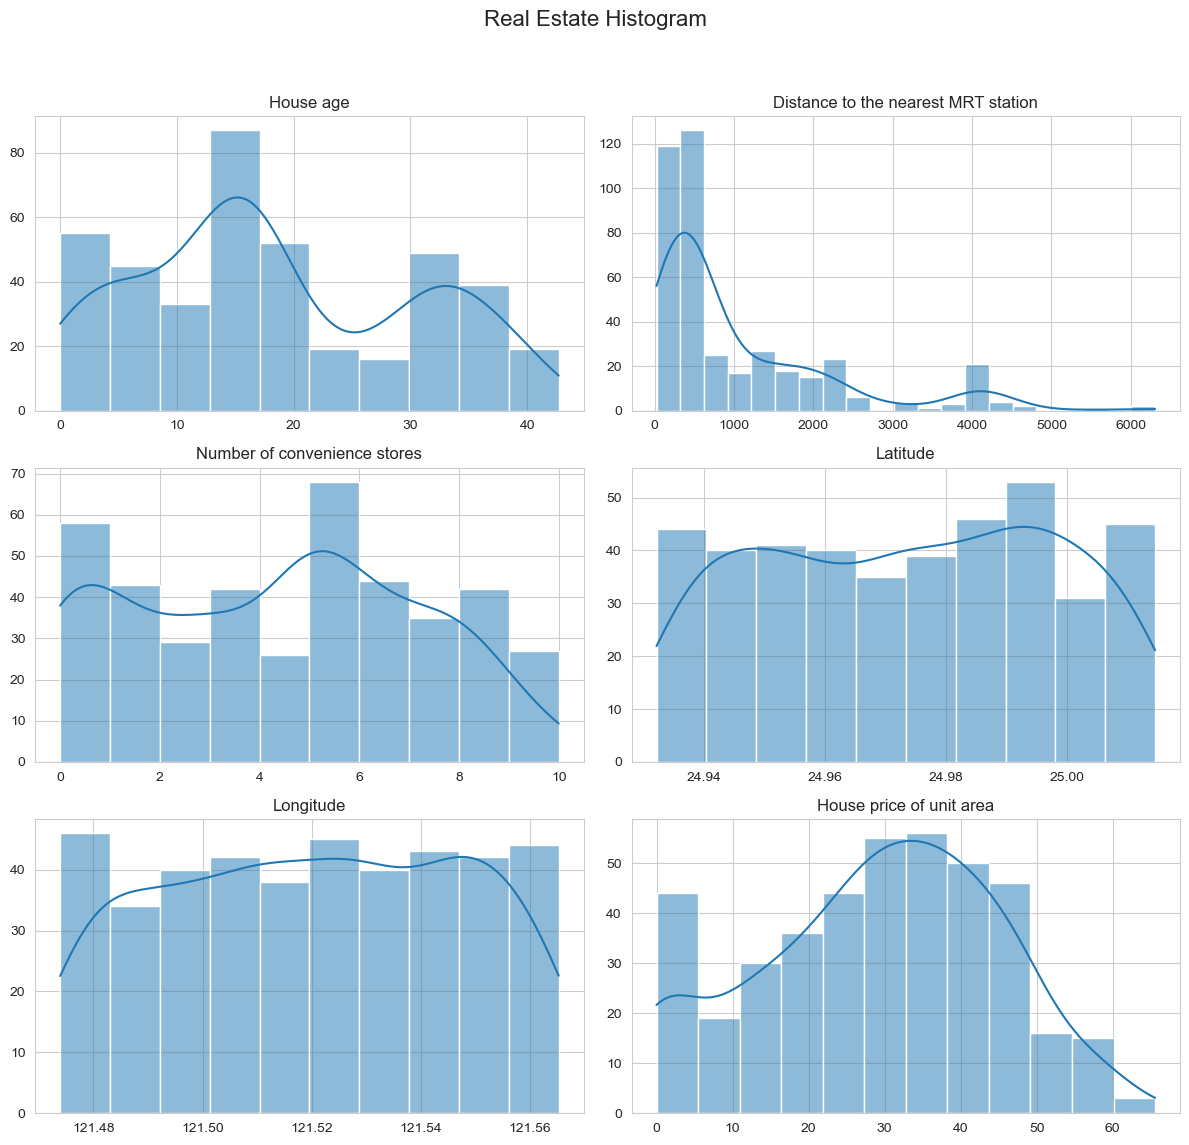

In [15]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.suptitle('Real Estate Histogram', fontsize=16)
cols=['House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude','House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2]),
    axes[i//2, i%2].set_title(col),
    axes[i//2, i%2].set_xlabel(''),
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
    
    

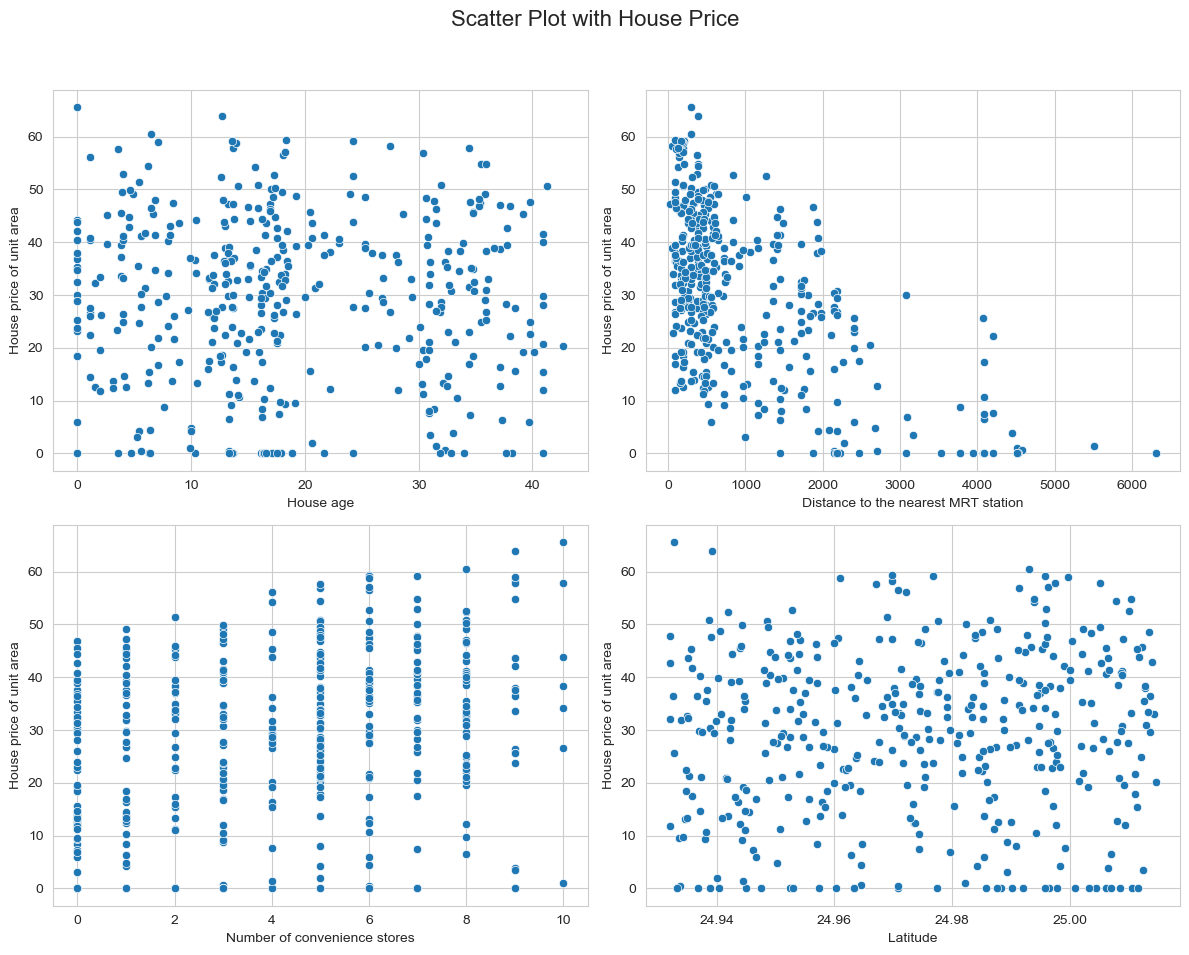

In [19]:
#Scatter Plots to find relationship with house price

fig, axes =plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

fig.suptitle('Scatter Plot with House Price', fontsize=16)

#Scatter plot for each 
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

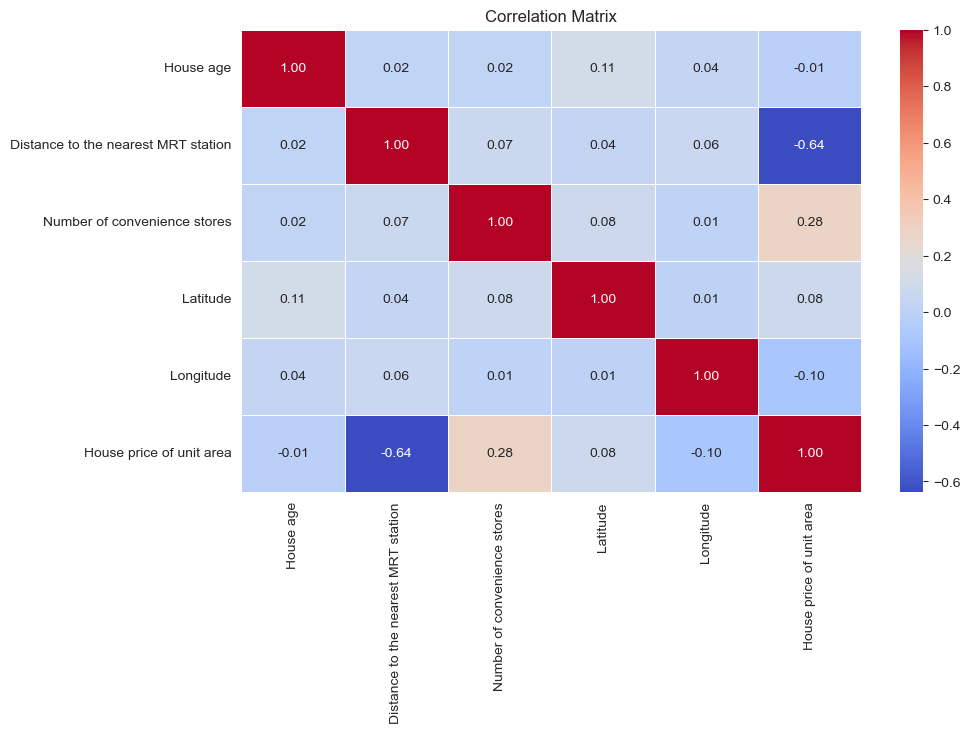

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


In [23]:
numeric_data = real_estate_data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths =.5)
plt.title('Correlation Matrix')
plt.show()

corr_matrix

In [25]:
features=['Distance to the nearest MRT station','Number of convenience stores','Latitude','Latitude']
target = 'House price of unit area'

X= real_estate_data[features]
y=real_estate_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

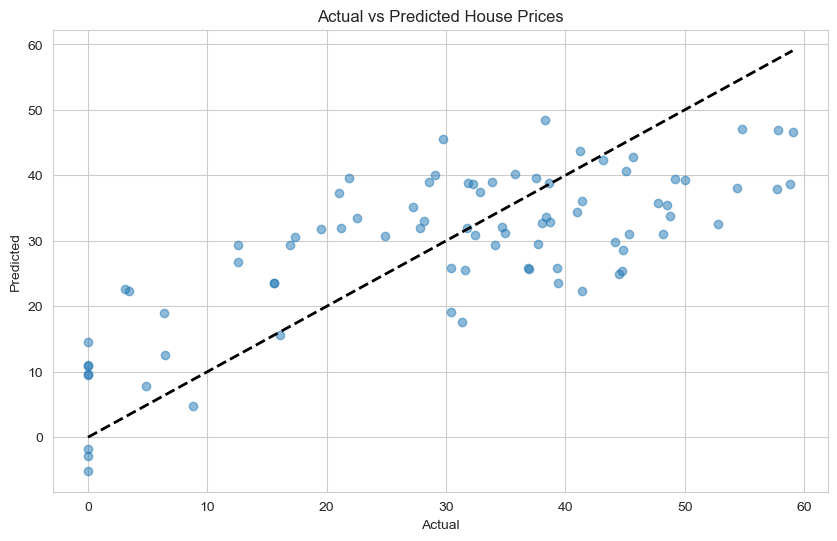

In [27]:
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs Predicted Value
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()